# Getting started with prenspire

In [1]:
import random
from pathlib import Path
from clophfit.prenspire import prenspire

%load_ext autoreload
%autoreload 2
tpath = Path("../../tests/EnSpire")

In [2]:
ef1 = prenspire.EnspireFile(tpath / "h148g-spettroC.csv")
ef2 = prenspire.EnspireFile(tpath / "e2-T-without_sample_column.csv")

In [3]:
ef1.metadata

{'Measurement date': '2011-10-03 17:12:33',
 'Chamber temperature at start': '20',
 'Chamber temperature at end': '20',
 'Ambient temperature at start': '6',
 'Ambient temperature at end': '9.3',
 'Protocol name': 'Eccitazione C',
 'Exported data': 'Well,Sample,MeasA:Result,MeasA:Wavelength',
 'warnings': ['WARNING: Some of the results may be invalid due to saturation of electronics. To fix the problem try to limit the excitation light or decrease the detector gain using the label editor.',
  'WARNING: Measured signal is saturated or the sample is totally opaque in the following wells:  MEAS A: B06']}

In [4]:
ef1.__dict__.keys()

dict_keys(['_ini', '_fin', '_data_list', '_metadata_post', '_well_list_platemap', '_platemap', 'metadata', '_filename'])

In [5]:
ef1.extract_measurements()
ef1.__dict__.keys()

dict_keys(['_ini', '_fin', '_data_list', '_metadata_post', '_well_list_platemap', '_platemap', 'metadata', '_filename', 'measurements', 'wells'])

In [6]:
ef2.extract_measurements()
ef2.wells

['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07']

In [7]:
ef1.measurements.keys(), ef2.measurements.keys()

(dict_keys(['A']), dict_keys(['B', 'A', 'C', 'D', 'E', 'F', 'G', 'H']))

when testing each spectra for the presence of a single wavelength in the appropriate monochromator

In [8]:
ef2.measurements["A"]["metadata"]

{'temp': '25',
 'Monochromator': 'Excitation',
 'Min wavelength': '400',
 'Max wavelength': '510',
 'Wavelength': '530',
 'Using of excitation filter': 'Top',
 'Measurement height': '8.9',
 'Number of flashes': '50',
 'Number of flashes integrated': '50',
 'Flash power': '100'}

In [9]:
ef2._data_list[0][::2]

['Well',
 'MeasB:WavelengthEms',
 'MeasA:WavelengthExc',
 'MeasA:Result',
 'MeasC:WavelengthEms',
 'MeasD:WavelengthExc',
 'MeasD:Result',
 'MeasE:WavelengthEms',
 'MeasF:WavelengthExc',
 'MeasF:Result',
 'MeasG:WavelengthEms',
 'MeasH:WavelengthExc',
 'MeasH:Result']

In [10]:
random.seed(11)
random.sample(ef1.measurements["A"]["F01"], 7)

[2163.0, 607.0, 1846.0, 517.0, 572.0, 2145.0, 2028.0]

In [11]:
en1 = prenspire.ExpNote(tpath / "h148g-spettroC-nota")

In [12]:
en1.wells[:7]

['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07']

In [13]:
en1.note_list[:5]

[['Well', 'pH', 'Chloride'],
 ['A01', '5.2', '0'],
 ['A02', '5.2', '6.7'],
 ['A03', '5.2', '13.3'],
 ['A04', '5.2', '26.7']]

In [14]:
en1.check_wells(ef1), en1.check_wells(ef2)

(True, False)

In [15]:
en1.build_titrations(ef1)

In [16]:
en1.__dict__.keys()

dict_keys(['note_list', 'wells', 'titrations', 'pH_values'])

In [17]:
en1.pH_values

['5.2', '6.3', '7.4', '8.1', '8.2']

In [18]:
tit0 = en1.titrations[0]
tit3 = en1.titrations[3]

In [19]:
tit0.__dict__.keys()

dict_keys(['conc', 'data', 'cl'])

In [20]:
tit0.conc, tit0.cl, tit3.conc, tit3.ph

([5.2, 6.3, 7.4, 8.1, 8.2],
 '0',
 [0.0, 6.7, 13.3, 26.7, 40.0, 60.0, 87.0, 120.0, 267.0, 400.0, 667.0],
 '7.4')

In [21]:
tit0.data["A"]

,5.2,6.3,7.4,8.1,8.2
,A01,B01,C01,D01,E01
lambda,,,,,
272.0,3151.0,4181.0,16413.0,29192.0,28816.0
273.0,3130.0,4204.0,16926.0,29909.0,29545.0
274.0,3043.0,4232.0,17331.0,30900.0,30750.0
275.0,3079.0,4283.0,17680.0,31717.0,31547.0
276.0,2975.0,4264.0,18020.0,32564.0,32336.0
...,...,...,...,...,...
496.0,636.0,4689.0,43230.0,87203.0,87842.0
497.0,683.0,4923.0,45173.0,89719.0,90666.0


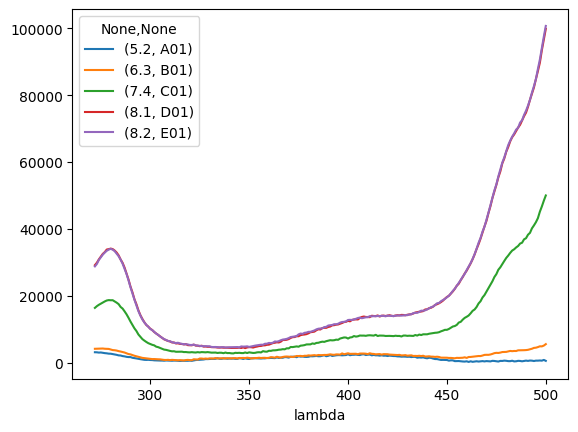

In [22]:
tit0.plot()

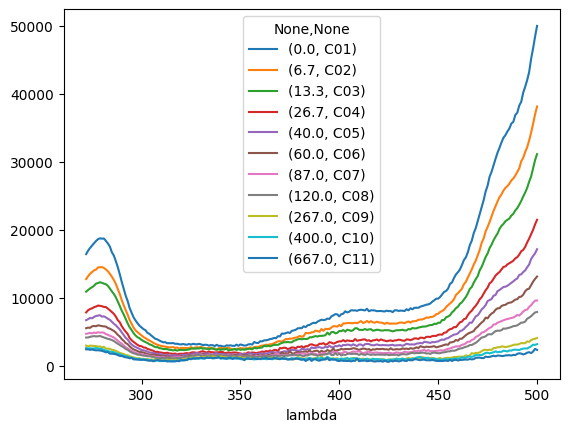

In [23]:
tit3.plot()